Jacob Solomon

Ryan Little

Physics 260 - Final Project

# Optimizing the efficiency of a magnetic propulsion system



## 1. Flat rings on the floor

### Optimizing B-field produced by the tube
parameters to be investigated:

1. arrangement of loops
    a. radius
    b. spacing
    c. side-by-side?
2. current in loops
    a. how much current in each wire (highest field strength to input power ratio)
    b. different amount of current in each wire?
3. TBD
.
.
.


Optimizing: Strength of B-field (MAX), Uniformity of B-field (MAX), Energy required to produce such B-field (MIN)

### Optimizing the force acting on the pod
parameters to be investigated:

1. location of magnetic dipole within B-field

2. multiple dipoles?

## 2. Solenoid tube

parameters TBD



### Import libraries


In [17]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
## The next line causes matplot lib it plot in the notebook, rather than poping up a window, for animations turn this off 
%matplotlib inline    
from mpl_toolkits.mplot3d import Axes3D   ## this is a special library to plot in 3d we are using today
import matplotlib as mpl
import matplotlib.cm as cm

### Function for calculating B-field at a point due to a ring with current

In [18]:
#####  B field function simplified
def Bloop(r_loop,x_pos,y_pos,z_pos,I,x,y,z):
    '''
    Parameters:
    r_loop: the radius of each loop
    x_pos: x coordinate of ring center
    y_pos: y coordinate of ring center
    z_pos: z coordinate of ring center
    I: how much current is in the ring
    x: x coordinate of point the function is solving for
    y: y coordinate of point the function is solving for
    z: z coordinate of point the function is solving for
    '''
    d_theta = 2*np.pi/100
    theta = np.arange(0, 2*np.pi, d_theta)
    x_loop = r_loop*np.cos(theta) + x_pos
    y_loop = r_loop*np.sin(theta) + y_pos
    
    dl_x = -r_loop * d_theta * np.sin(theta)
    dl_y = r_loop * d_theta * np.cos(theta)
    
    x_sep = x - x_loop
    y_sep = y - y_loop
    z_sep = z - z_pos
    
    mag_rsep = np.sqrt(x_sep**2 + y_sep**2 + z_sep**2)
    
    Bx = np.sum((1.2566e-6)/(4*np.pi)*I*(dl_y*z_sep)*mag_rsep**-3)
    By = np.sum((1.2566e-6)/(4*np.pi)*I*(-dl_x*z_sep)*mag_rsep**-3)
    Bz = np.sum((1.2566e-6)/(4*np.pi)*I*(dl_x*y_sep-dl_y*x_sep)*mag_rsep**-3)
    
    return(Bx,By,Bz)

### Function for creating a plane of B-field data in the xz plane

In [19]:
def B_xz_plane(x_min, x_max, z_min, z_max, x_step, z_step, y_value, r_loop, x_pos, y_pos, z_pos, I):
    '''
    parameters:
    x_min: minimum x value of plane
    x_max: maximum x value of plane
    z_min: minimum z value of plane
    z_max: maximum z value of plane
    x_step: distance from each x value to the next
    z_step: distance from each z value to the next
    y_value: y value of xz plane
    R_loop: radius of the ring
    x_pos: x coordinate of ring center
    y_pos: y coordinate of ring center
    z_pos: z coordinate of ring center
    I: how much current is in the ring
    '''
    x_range = np.arange(x_min, x_max, x_step)
    z_range = np.arange(z_min, z_max, z_step)
    
    Bx = np.zeros((np.size(z_range),np.size(x_range)))
    By = np.zeros((np.size(z_range),np.size(x_range)))
    Bz = np.zeros((np.size(z_range),np.size(x_range)))
    
    i = 0
    while(i < np.size(x_range)):
        n = 0
        while(n < np.size(z_range)):
            Bx[n,i], By[n,i], Bz[n,i] = Bloop(r_loop,x_pos,y_pos,z_pos,I,x_range[i],y_value,z_range[n])
            n += 1
        i += 1
    return(Bx, By, Bz)

In [80]:
## define global parameters
x_min = -10
x_max = 10
z_min = -1
z_max = 1
y_value = 0
z_pos = 0

## 1. Flat rings on the floor
### First Iteration
Radius = 0.5m

Spacing (center to center) = 1m (no overlap)

arrangement: single line

Current = 100A

for force, Jeff said the force on a dipole equals the cross product of the dipole moment, M, and the B-field
and the dipole of a ring of current equals the magnitude of current times the area vector


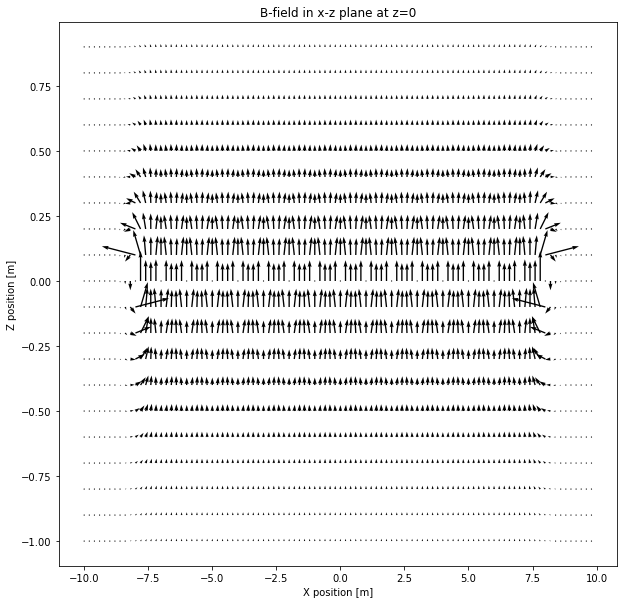

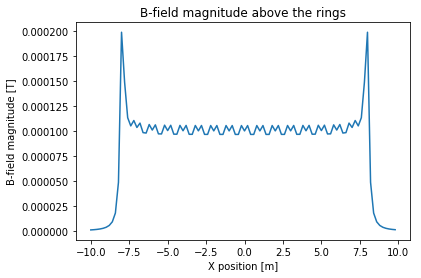

In [107]:
## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
num_rings = 16
spacing = 1
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to sovle for the B-field
m = 0
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*250):
            ok[n,i] = 0 
        n += 1
    i += 1
    
## plots    
plt.figure(figsize=(10,10))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()


plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

### Second Iteration
Radius = 0.5m

Spacing(center to center) = 0.75m 

arrangement: single line

Current = 100A

#### Changes from previous iteration: 
- the centers of the rings are only 0.9m away from each other so that there is overlap


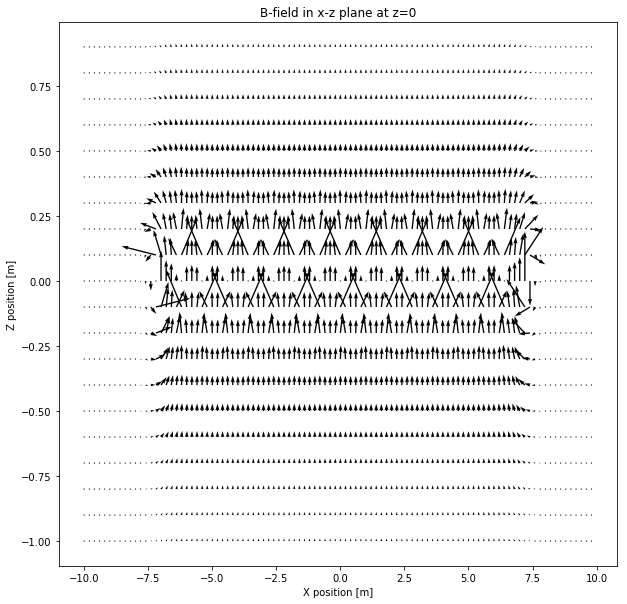

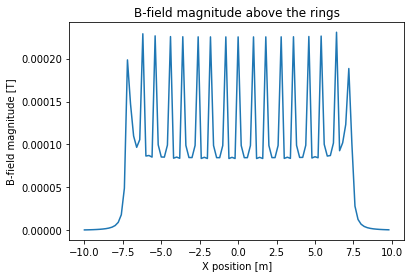

In [106]:
## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to sovle for the B-field
m = 0
num_rings = 16 # np.floor(x_max*2/R_loop)
spacing = 0.9
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*200000000):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots    
plt.figure(figsize=(10,10))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()


plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

#### Results

The B-field produced when the rings overlap is stronger but more irratic. A uniform B-field is very desirable as it would make the motion of the pod smoother. In the next iteration we'll see explore moving the rings even closer to each other.

### Third Iteration
Radius = 0.5m

Spacing (center to center) = 0.5m 

Arrangement: single line

Current = 100A

#### Calculation


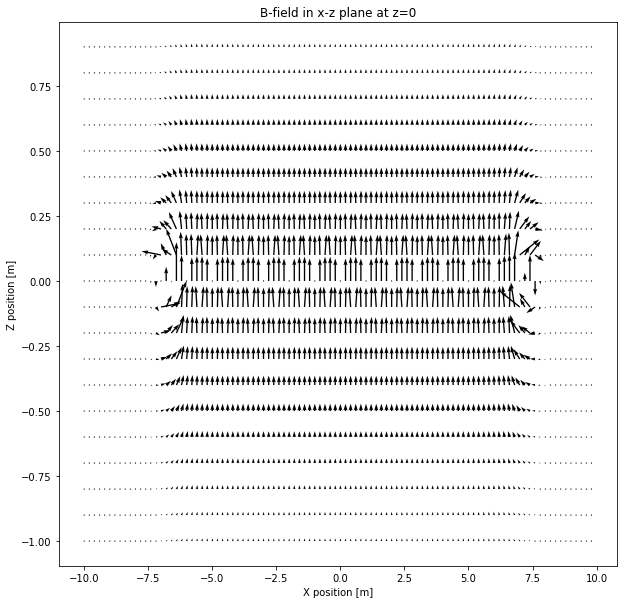

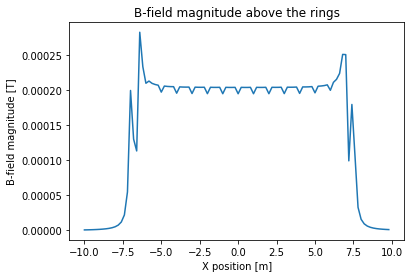

In [105]:
## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to sovle for the B-field
m = 0
num_rings = 28 # np.floor(x_max*2/R_loop)
spacing = 0.5
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*20000000000):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots    
plt.figure(figsize=(10,10))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()


plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

#### Results

This B-field is significantly stronger and more uniform than both previous iterations. This shows that overlapping the ringsTo find the sweet spot of how much the rings should overlap we will keep on experimenting.

### Fourth Iteration
Radius = ??m

Spacing = ??m (center to center)

Side to Side: No, single line

Current = ??A

#### Calculation


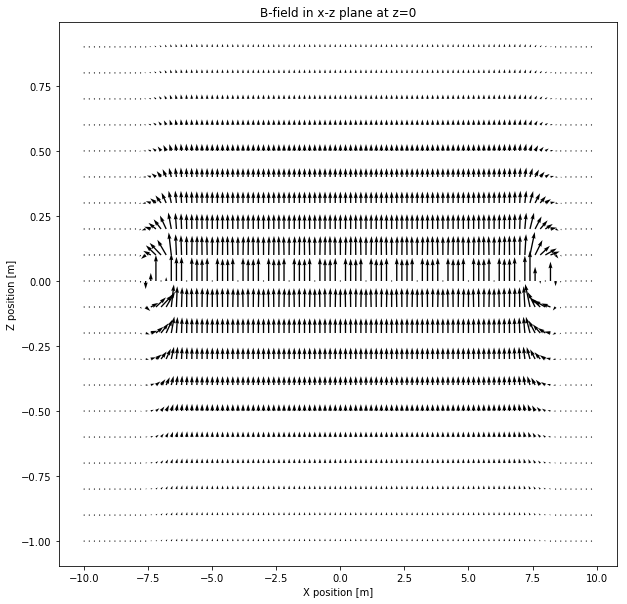

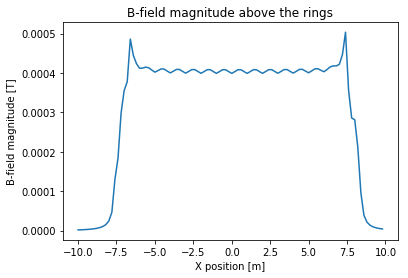

In [104]:
## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to sovle for the B-field
m = 0
num_rings = 60 # np.floor(x_max*2/R_loop)
spacing = 0.25
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*20000000000):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots    
plt.figure(figsize=(10,10))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()


plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

#### Results

### Fifth Iteration
Radius = ??m

Spacing = ??m (center to center)

Side to Side: No, single line

Current = ??A

#### Calculation

#### Results

And so on...

## 2. Solenoid Tube
### First Iteration
Parameters (TBD)

#### Calculation

#### Results

And so on...